[137, 102, 82, 0, 307]


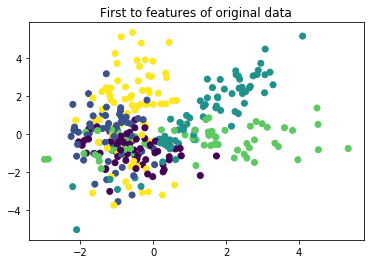

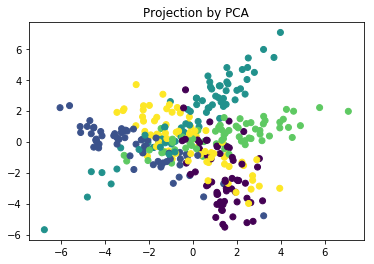

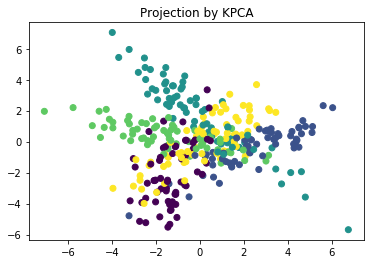

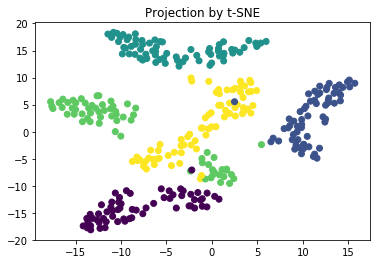

In [53]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def gen_gaussian_data(num_feat=10, num_samples=100, num_class=5):
    means = np.random.normal(loc = 0, scale = 1, size=(num_class, num_feat))
    cov = [make_spd_matrix(num_feat, random_state=None) for i  in range(num_class)]
    x = np.zeros((num_samples*num_class, num_feat))
    y = np.zeros(num_samples*num_class)
    for i in range(num_class):
        x[i*num_samples:(i+1)*num_samples, :] = np.random.multivariate_normal(mean=means[i], cov=cov[i], size=num_samples)
        y[i*num_samples:(i+1)*num_samples] = i
    
    return x, y


def add_outliers(data, num_outliers=5,  features=(0, 1), outlier_mult=5):
    sample_ind = [int(x) for x in data.shape[0]*np.random.rand(num_outliers)]
    print(sample_ind)
    [data[samp_ind, feat_ind]*outlier_mult for samp_ind in sample_ind for feat_ind in features 
    
    return data
    
    
X, y = gen_gaussian_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=None)

X_train = add_outliers(X_train)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

kpca = KernelPCA(n_components=2)
kpca_result = kpca.fit_transform(X_train)

tsne_result = TSNE(random_state=None).fit_transform(X_train)

# Need to convert X to only having positive elements
#nmf = NMF(n_components=5, solver="mu")
#W = nmf.fit_transform(X_train)
#H = nmf.components_

plt.figure(0)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title("First to features of original data")
     
plt.figure(1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_train)
plt.title("Projection by PCA")

plt.figure(2)
plt.scatter(kpca_result[:,0], kpca_result[:,1], c=y_train)
plt.title("Projection by KPCA")

plt.figure(3)
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=y_train)
plt.title("Projection by t-SNE")

plt.show()


In [42]:
a = np.array([[1, 2, 3, 4, 5], [3, 4, 5 ,6, 7]])
print(a[(0, 1), 2])

[3 5]
